# Di-Know: Diabetes prediction using machine learning models

The notebook contains code for EDA and ML model training and testing

In [60]:
!pip install matplotlib

^C


# Import datasets and libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet
import xgboost as xgb

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve 
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import numpy as np


import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline as ImbPipeline

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.metrics import Recall

In [2]:
df= pd.read_csv("D:\Ash_ML\ML_web\Diabetes_proj\datasets\diabetes_dataset.csv")

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\ashwi\AppData\Local\Temp\ipykernel_14268\1539008674.py:1: SyntaxWarning: invalid escape sequence '\A'
  df= pd.read_csv("D:\Ash_ML\ML_web\Diabetes_proj\datasets\diabetes_dataset.csv")


In [3]:
# Correlation matrix
correlation_matrix = df.corr()
# Correlation with the target column 'Outcome'
correlation_with_target = correlation_matrix['Outcome'].sort_values(ascending=True)
print("Correlation with target Outcome:\n", correlation_with_target)

#INFERENCE: Wesee that glucose levels have the highest corelation with diabetic outcome followed by BMI and Age. Lowest correlation for blood pressure.

Correlation with target Outcome:
 BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
DiabetesPedigreeFunction    0.173844
Pregnancies                 0.221898
Age                         0.238356
BMI                         0.292695
Glucose                     0.466581
Outcome                     1.000000
Name: Outcome, dtype: float64


In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### EDA

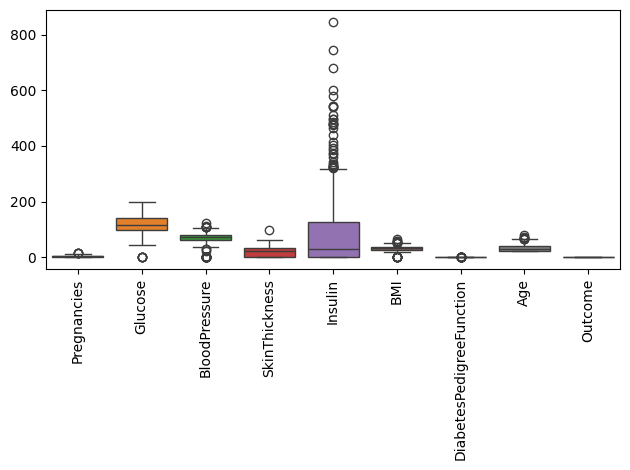

In [6]:
import seaborn as sns
sns.boxplot(data=df)  #making a box plot to visualize the spread of data across all the columns

plt.xticks(rotation=90) # Rotate x-axis labels by 90 degrees
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


In [7]:
print(f"shape of dataset, {df.shape}")

shape of dataset, (768, 9)


In [8]:
df.info()
 #shows zero null values in all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
missing_values = df.isnull().sum()

print("Missing values count:\n", missing_values)

Missing values count:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [11]:
class_counts = df['Outcome'].value_counts()
class_counts

Outcome
0    500
1    268
Name: count, dtype: int64

## Some inference from the statstical data:

1. Insulin seems to have huge outlier issue. The 75th percentile is around 127 units, while the max is more than 800 units.
2. Some features have zero values (no physiological logic): e.g., Glucose, BloodPressure, BMI. Can replace zeros with np.nan and then impute (mean, median, or KNN imputation).

# Data pre-processing: Missing values and outliers

In [12]:
x_train,X_= train_test_split(df, test_size=0.3, random_state=42)
x_cv, x_test= train_test_split(X_, test_size=0.5, random_state=42)
del X_

print(f"shape of X_train, {x_train.shape}")

print(f"shape of X_test, {x_test.shape}")

print(f"shape of X_cv, {x_cv.shape}")




shape of X_train, (537, 9)
shape of X_test, (116, 9)
shape of X_cv, (115, 9)


In [13]:
x_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [14]:
type(x_train)

pandas.core.frame.DataFrame

### Handling zeros in Glucose, BP, BMI and insulin

In [15]:
cols_with_invalid_zeros = ['Glucose', 'BloodPressure', 'BMI', 'Insulin'] #columns where zero is not a valid value

for data in [x_train, x_cv, x_test]:
    data[cols_with_invalid_zeros] = data[cols_with_invalid_zeros].replace(0, np.nan)


In [16]:
[x_train.isnull().sum(), x_cv.isnull().sum(), x_test.isnull().sum()]


[Pregnancies                   0
 Glucose                       5
 BloodPressure                19
 SkinThickness                 0
 Insulin                     261
 BMI                           5
 DiabetesPedigreeFunction      0
 Age                           0
 Outcome                       0
 dtype: int64,
 Pregnancies                  0
 Glucose                      0
 BloodPressure                9
 SkinThickness                0
 Insulin                     54
 BMI                          2
 DiabetesPedigreeFunction     0
 Age                          0
 Outcome                      0
 dtype: int64,
 Pregnancies                  0
 Glucose                      0
 BloodPressure                7
 SkinThickness                0
 Insulin                     59
 BMI                          4
 DiabetesPedigreeFunction     0
 Age                          0
 Outcome                      0
 dtype: int64]

As shown above, missing values for glucose, BMI and BP are quite small when compared to insulin. We can use 'median' to impute the missing values of the three features. Median is robust to outliers and for a small number of missing values, median imputation will not distort the overall distribution.

In [17]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
cols_for_median_impute = ['Glucose', 'BloodPressure', 'BMI']

# Fit only on training data
x_train[cols_for_median_impute] = imputer.fit_transform(x_train[cols_for_median_impute])

# Apply to CV and test
x_cv[cols_for_median_impute] = imputer.transform(x_cv[cols_for_median_impute])
x_test[cols_for_median_impute] = imputer.transform(x_test[cols_for_median_impute])


In [18]:
#check post imputation
[x_train.isnull().sum(), x_cv.isnull().sum(), x_test.isnull().sum()]


[Pregnancies                   0
 Glucose                       0
 BloodPressure                 0
 SkinThickness                 0
 Insulin                     261
 BMI                           0
 DiabetesPedigreeFunction      0
 Age                           0
 Outcome                       0
 dtype: int64,
 Pregnancies                  0
 Glucose                      0
 BloodPressure                0
 SkinThickness                0
 Insulin                     54
 BMI                          0
 DiabetesPedigreeFunction     0
 Age                          0
 Outcome                      0
 dtype: int64,
 Pregnancies                  0
 Glucose                      0
 BloodPressure                0
 SkinThickness                0
 Insulin                     59
 BMI                          0
 DiabetesPedigreeFunction     0
 Age                          0
 Outcome                      0
 dtype: int64]

Plotting insulin missingness against other features

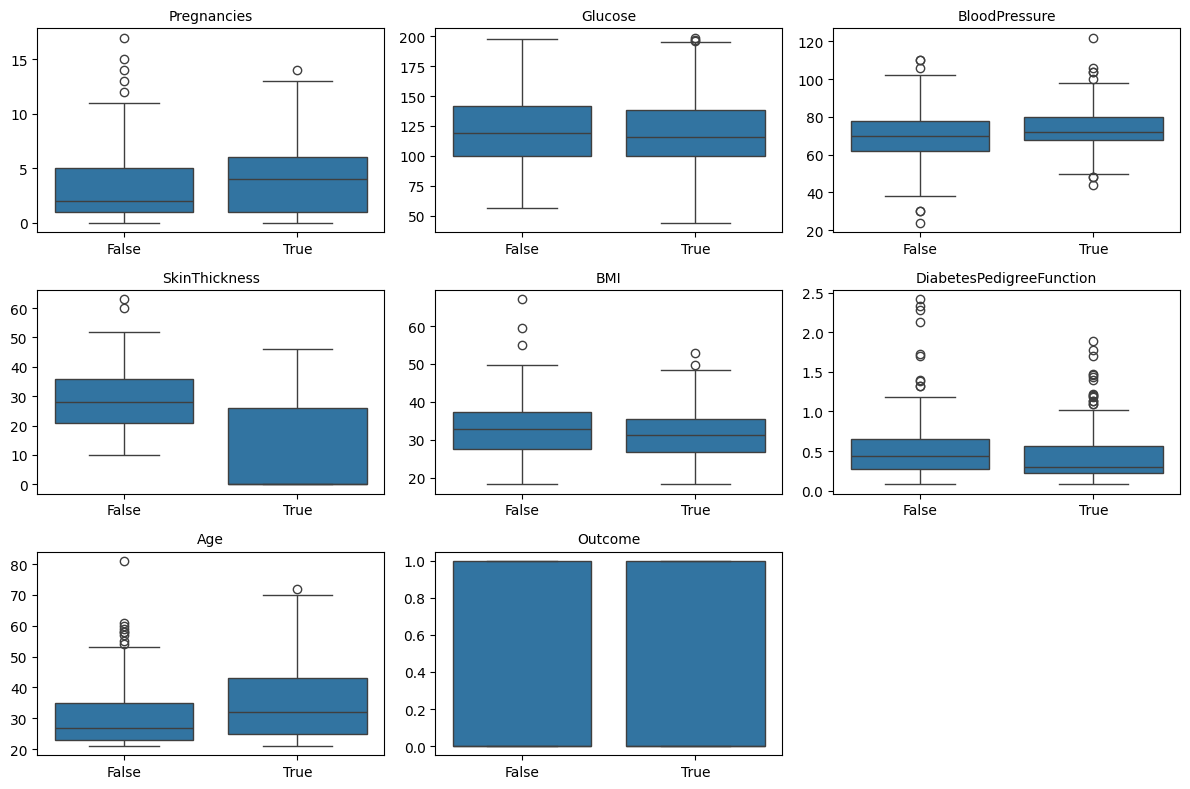

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns


x_train['Insulin_missing'] = x_train['Insulin'].isna()

# Features to compare
features_to_compare = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


fig, axes = plt.subplots(3, 3, figsize=(12, 8))  # Adjust figsize for compact view
axes = axes.flatten()

#comparing the features against the missing values in insulin (True or False)

for i, feature in enumerate(features_to_compare):
    sns.boxplot(x='Insulin_missing', y=feature, data=x_train, ax=axes[i])
    axes[i].set_title(feature, fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


The above plots show box plots representing relationships between missing/non-missing values in Insulin compared to other features. More specifically, features like Age, Skin thicknesS seem to show more relation w.r.t inssulin. But, I do not seem to find a meangiful relationship based on real-world intution for the MAR based on Age and Skin thickness. So, I will not still consider this as a serious case of MAR. But, will use KNN-based imputations given the large number of missing values in the Insulin feature.

Ideally, we should do Mann Whitney U test or any other preferable statistic tests to confirm differences

In [20]:
#check group means
check = pd.DataFrame(x_train.groupby('Insulin_missing')[features_to_compare].mean())
check

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
Insulin_missing,,,,,,,,
False,3.235507,123.467391,70.427536,28.833333,32.901812,0.513554,30.615942,0.326087
True,4.245211,120.321839,74.141762,11.547893,31.609195,0.423778,35.674330,0.375479


In [21]:
x_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,537.000000,537.000000,537.000000,537.000000,276.000000,537.000000,537.000000,537.000000,537.000000
mean,3.726257,121.938547,72.232775,20.432030,155.333333,32.273557,0.469920,33.074488,0.350093
std,3.262965,30.142292,12.204867,15.490715,118.722860,6.964647,0.342087,11.685319,0.477444
min,0.000000,44.000000,24.000000,0.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,0.000000,80.500000,27.100000,0.241000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,125.000000,32.000000,0.374000,29.000000,0.000000
75%,6.000000,139.000000,80.000000,32.000000,183.250000,36.500000,0.612000,41.000000,1.000000
max,17.000000,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


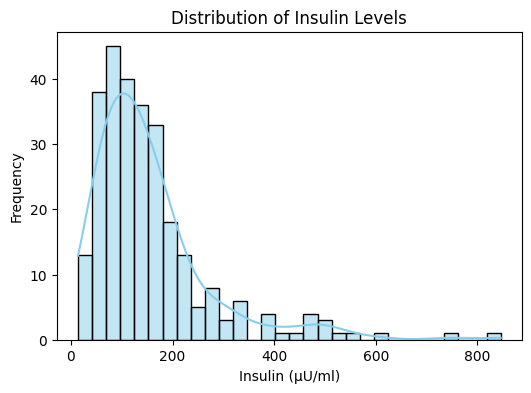

In [22]:


plt.figure(figsize=(6,4))
sns.histplot(x_train['Insulin'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Insulin Levels')
plt.xlabel('Insulin (µU/ml)')
plt.ylabel('Frequency')
plt.show()


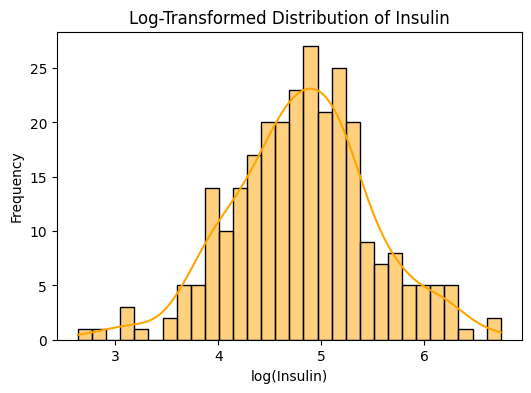

In [23]:


plt.figure(figsize=(6,4))
sns.histplot(np.log(x_train['Insulin']), kde=True, bins=30, color='orange')
plt.title('Log-Transformed Distribution of Insulin')
plt.xlabel('log(Insulin)')
plt.ylabel('Frequency')
plt.show()


In [24]:
x_train.isna().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     261
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
Insulin_missing               0
dtype: int64

In [25]:
x_train.drop(columns=['Insulin_missing'], inplace=True)

Imputing the Insulin missing values using KNN method. Since the insulin feature seems to dealing with MAR (missing at random) misisng value problem, it is best to use KNN-based imputation for the feature.

In [26]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
334,1,95.0,60.0,18,58.0,23.9,0.260,22,0
139,5,105.0,72.0,29,325.0,36.9,0.159,28,0
485,0,135.0,68.0,42,250.0,42.3,0.365,24,1
547,4,131.0,68.0,21,166.0,33.1,0.160,28,0
18,1,103.0,30.0,38,83.0,43.3,0.183,33,0


In [27]:
from sklearn.impute import KNNImputer

# Columns to impute
features_for_imputation = ['Insulin','Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age']

knn_imputer = KNNImputer(n_neighbors=5)


x_train[features_for_imputation] = knn_imputer.fit_transform(x_train[features_for_imputation])


x_cv[features_for_imputation] = knn_imputer.transform(x_cv[features_for_imputation])
x_test[features_for_imputation] = knn_imputer.transform(x_test[features_for_imputation])

print(df.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [28]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

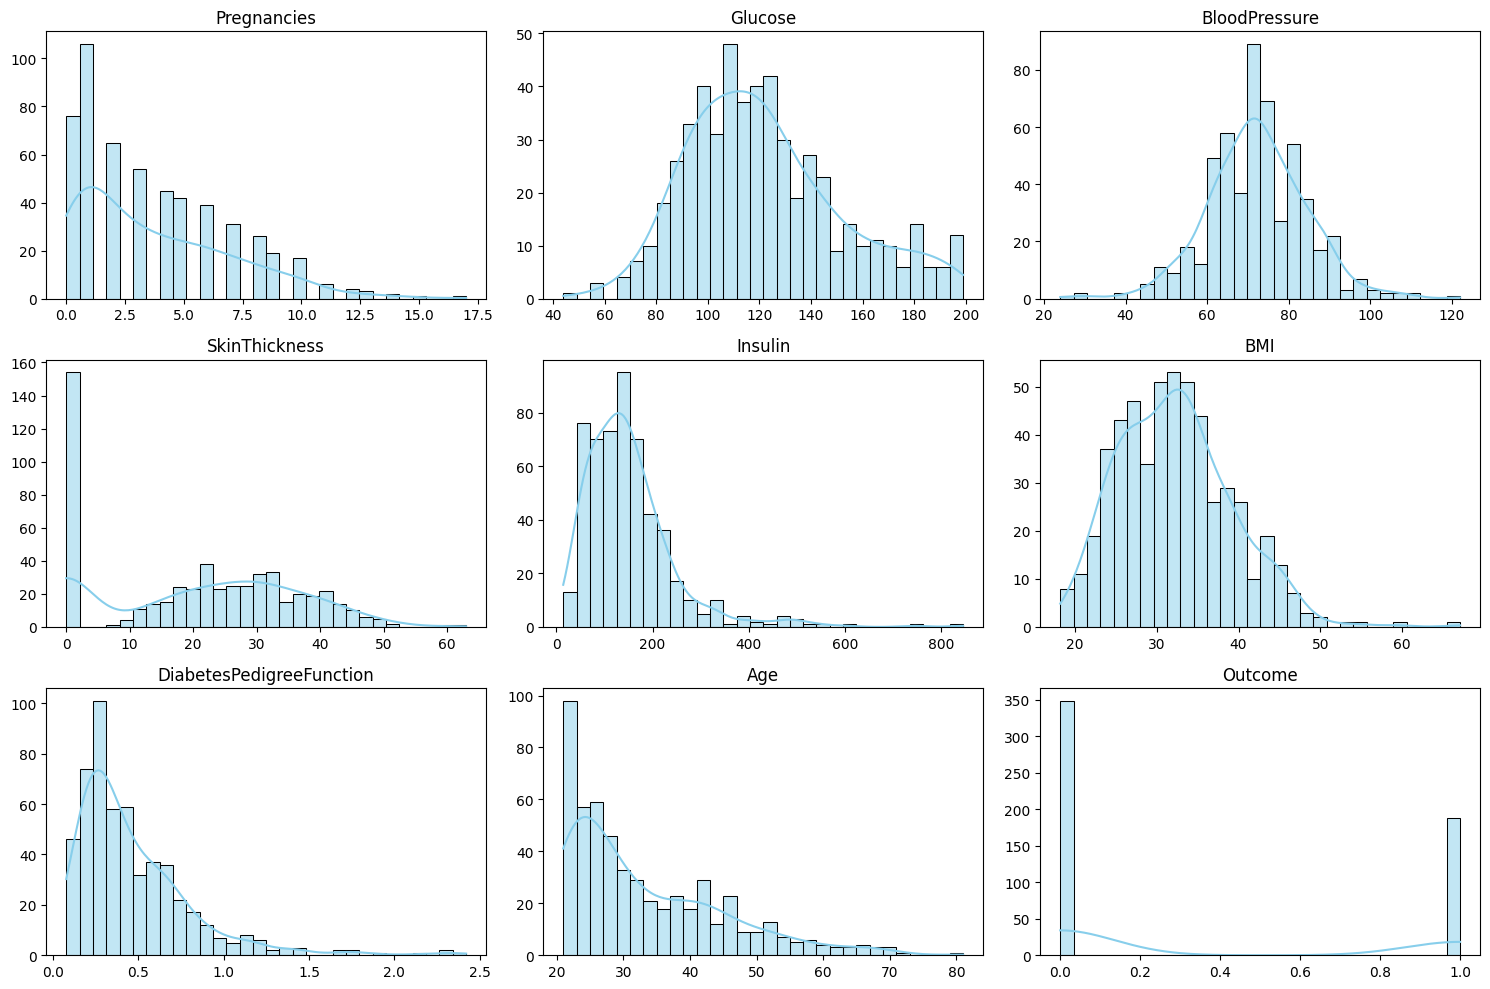

In [29]:


# List of features to plot
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
            'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Set up the grid for subplots
n_cols = 3
n_rows = (len(features) + n_cols - 1) // n_cols  # calculate rows needed
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()  # flatten to 1D array for easy iteration

# Loop through features and plot histogram for each
for i, feature in enumerate(features):
    sns.histplot(x_train[feature], kde=True, bins=30, ax=axes[i], color='skyblue')
    axes[i].set_title(feature)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Log transformation on skewed data

In [30]:


# Log-transform skewed features (added 1 to avoid log(0))


for col in ['Insulin', 'DiabetesPedigreeFunction', 'Pregnancies', 'SkinThickness']:
    x_train[col] = np.log1p(x_train[col])
    x_cv[col] = np.log1p(x_cv[col])
    x_test[col] = np.log1p(x_test[col])


In [31]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


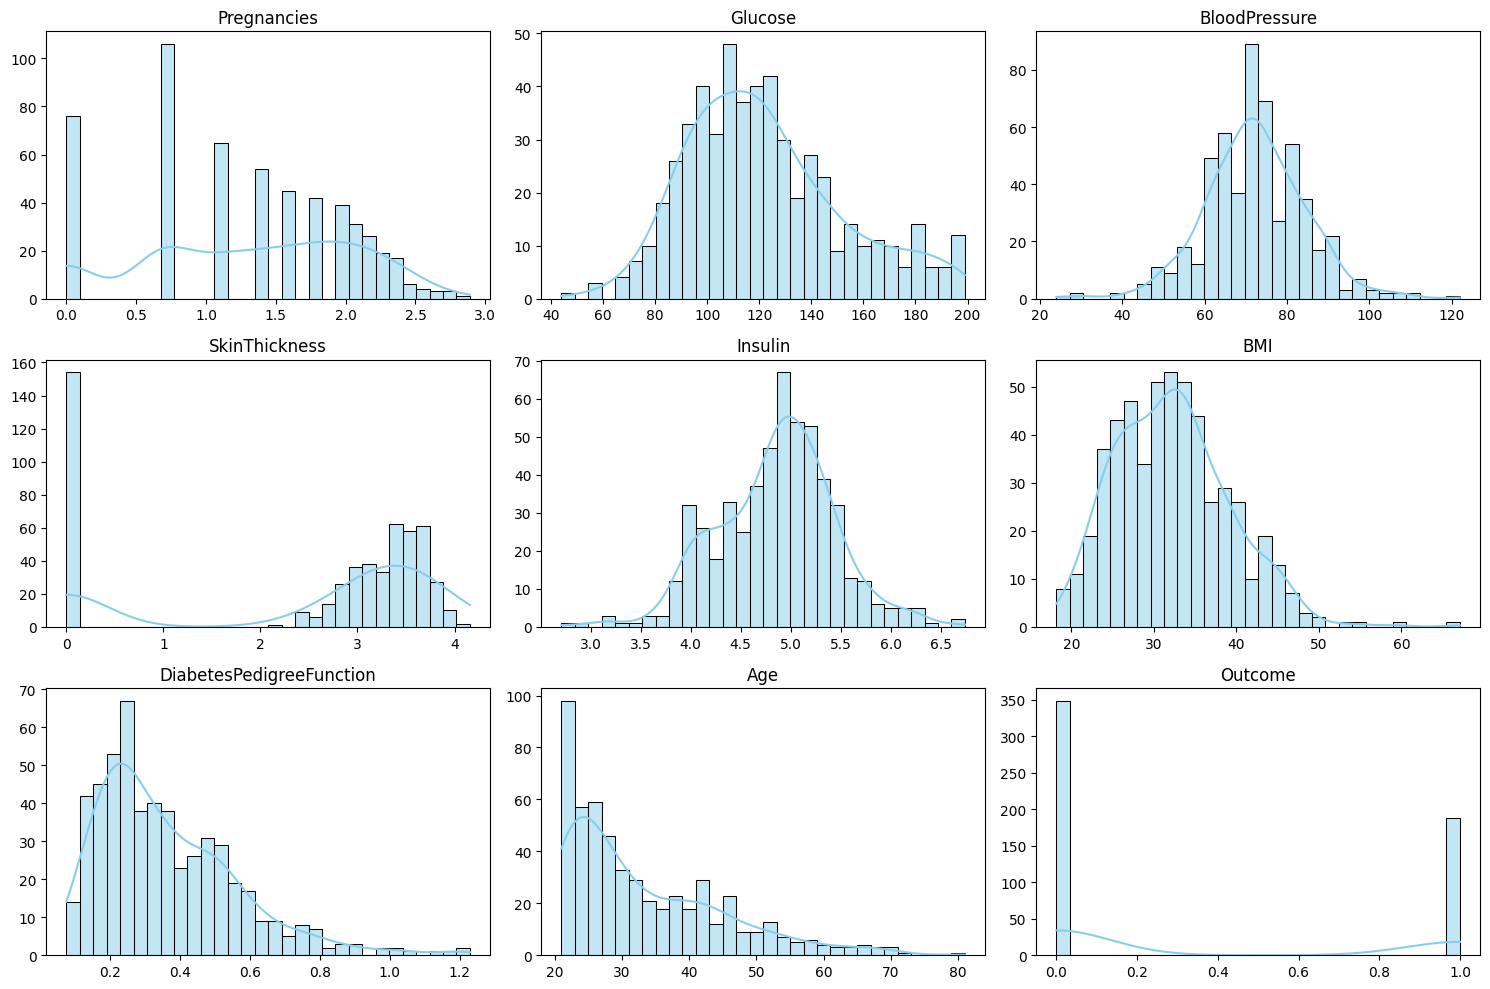

In [32]:
#POST LOG TRANSFORMATION

# List of features to plot
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
            'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Set up the grid for subplots
n_cols = 3
n_rows = (len(features) + n_cols - 1) // n_cols  # calculate rows needed
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()  # flatten to 1D array for easy iteration

# Loop through features and plot histogram for each
for i, feature in enumerate(features):
    sns.histplot(x_train[feature], kde=True, bins=30, ax=axes[i], color='skyblue')
    axes[i].set_title(feature)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Winsorization for handling outliers


In [33]:
#  Clip/winsorize numeric columns using train percentiles (1%-99%)

lower_pct = 0.01
upper_pct = 0.99

target_col = 'Outcome'   
y_train = x_train[target_col].reset_index(drop=True)
y_cv    = x_cv[target_col].reset_index(drop=True)
y_test  = x_test[target_col].reset_index(drop=True)


x_train_features = x_train.drop(columns=[target_col])
x_cv_features    = x_cv.drop(columns=[target_col])
x_test_features  = x_test.drop(columns=[target_col])

# identify numeric & categorical columns
num_cols = x_train_features.select_dtypes(include=['float64', 'int64']).columns.tolist()
cat_cols = x_train_features.select_dtypes(include=['object', 'category']).columns.tolist()


percentile_lo = x_train_features[num_cols].quantile(lower_pct)
percentile_hi = x_train_features[num_cols].quantile(upper_pct)

x_train_clip = x_train_features[num_cols].clip(lower=percentile_lo, upper=percentile_hi, axis=1)
x_cv_clip    = x_cv_features[num_cols].clip(lower=percentile_lo, upper=percentile_hi, axis=1)
x_test_clip  = x_test_features[num_cols].clip(lower=percentile_lo, upper=percentile_hi, axis=1)

# concatenating back categorical columns and target
x_train_clip = pd.concat([x_train_clip.reset_index(drop=True),
                          x_train_features[cat_cols].reset_index(drop=True),
                          y_train], axis=1)

x_cv_clip = pd.concat([x_cv_clip.reset_index(drop=True),
                       x_cv_features[cat_cols].reset_index(drop=True),
                       y_cv], axis=1)

x_test_clip = pd.concat([x_test_clip.reset_index(drop=True),
                         x_test_features[cat_cols].reset_index(drop=True),
                         y_test], axis=1)

print("Applied winsorization (train percentiles). Sample mins/maxes (train):")
display(x_train_clip[num_cols].agg(['min','median','max']).T)


Applied winsorization (train percentiles). Sample mins/maxes (train):


,min,median,max
Pregnancies,0.000000,1.386294,2.639057
Glucose,67.360000,117.000000,196.000000
BloodPressure,44.000000,72.000000,104.000000
SkinThickness,0.000000,3.178054,3.931826
Insulin,3.343925,4.912655,6.225644
BMI,19.536000,32.000000,49.132000
DiabetesPedigreeFunction,0.086250,0.317726,1.016279
Age,21.000000,29.000000,67.640000


# Data prep for ML

In [34]:

# Correlation matrix
correlation_matrix = x_train_clip.corr()
# Correlation with the target column 'Outcome'
correlation_with_target = correlation_matrix['Outcome'].sort_values(ascending=True)
print("Correlation with target Outcome:\n", correlation_with_target)



Correlation with target Outcome:
 SkinThickness              -0.025107
DiabetesPedigreeFunction    0.156292
Pregnancies                 0.157515
BloodPressure               0.181566
Age                         0.285366
BMI                         0.338500
Insulin                     0.387055
Glucose                     0.518537
Outcome                     1.000000
Name: Outcome, dtype: float64


With the data processing on misisng values completed, we can clearly see the correlation values have changed from what was originally observed. We can see Insulin, in particular, has improved its correlation score w.r.t Outcome.  In T2D. Pancreas produces extra insulin to compensate insulin resistance. Insulin levels increaseFrom clinical terms, I see a lot of value in this improvement because Insulin levels are a good predictor of diabetes. SkinThickness seems to have nea-zero correlation after all data-preprocessing. Not an issue becuase I wouldn't consider it has an important measure of diabetic tendency (in the likes of glucose or insulin)


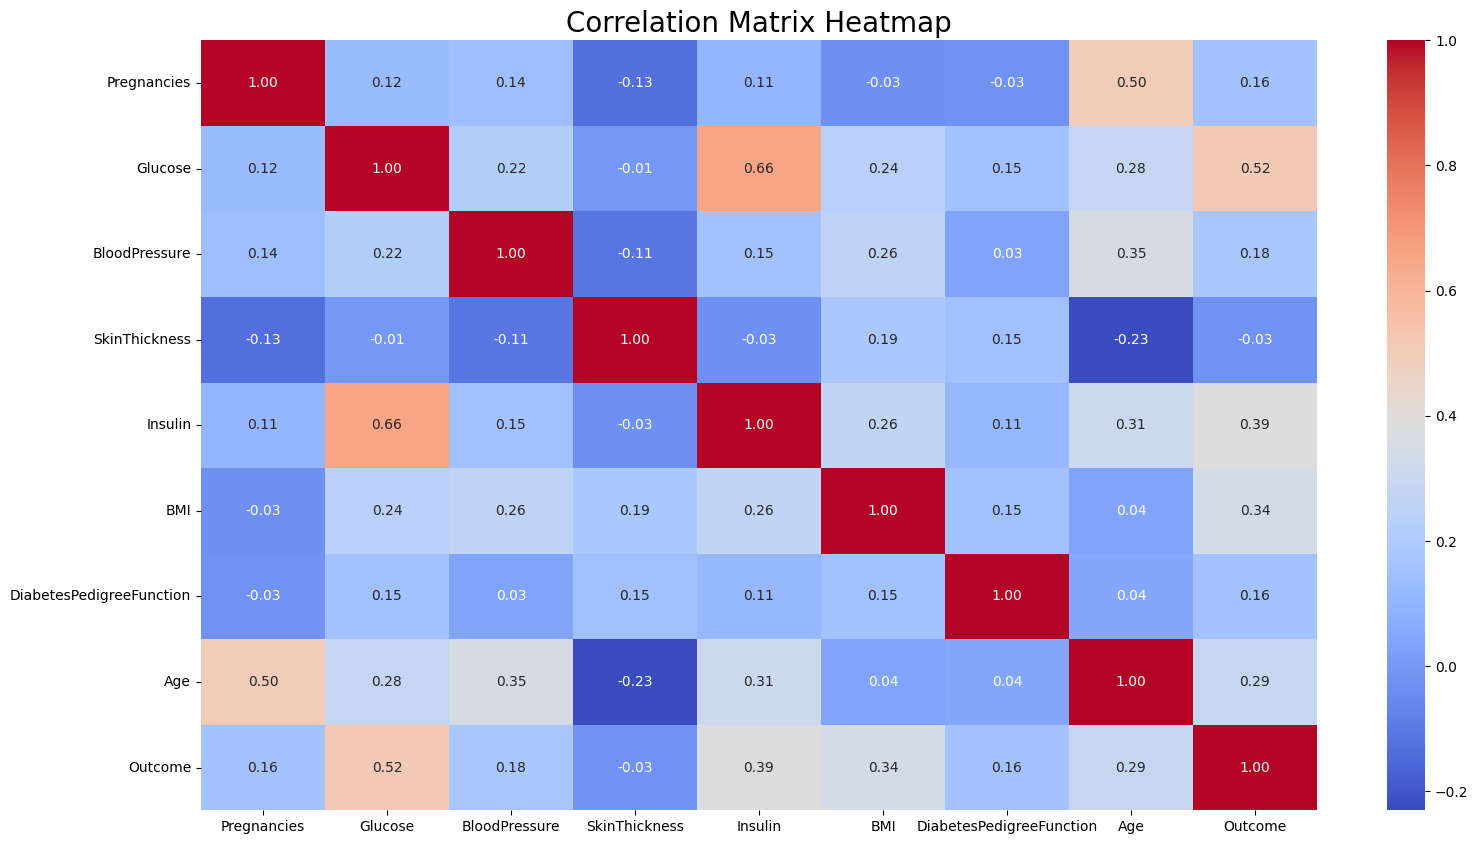

In [35]:
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f') #uses seaborn (sns) library, annot helps to display correlaton value with the each cells itself
#fmt=.2f is for displaying values with 2 decimal places
plt.title('Correlation Matrix Heatmap', fontsize=20)
plt.show()

making the data-target pairs for ML models

In [36]:
y_train = x_train_clip['Outcome']
y_cv    = x_cv_clip['Outcome']
y_test  = x_test_clip['Outcome']


x_train = x_train_clip.drop(columns=['Outcome'])
x_cv    = x_cv_clip.drop(columns=['Outcome'])
x_test  = x_test_clip.drop(columns=['Outcome'])



print(f"shape of X_train, {x_train.shape}")

print(f"shape of X_test, {x_test.shape}")

print(f"shape of X_cv, {x_cv.shape}")

print(f"shape of y_train (target), {y_train.shape}")
print(f"shape of y_test (target), {y_test.shape}")
print(f"shape of y_cv (target), {y_cv.shape}")


shape of X_train, (537, 8)
shape of X_test, (116, 8)
shape of X_cv, (115, 8)
shape of y_train (target), (537,)
shape of y_test (target), (116,)
shape of y_cv (target), (115,)


In [37]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.693147,95.0,60.0,2.944439,4.077537,23.9,0.231112,22.0
1,1.791759,105.0,72.0,3.401197,5.786897,36.9,0.147558,28.0
2,0.000000,135.0,68.0,3.761200,5.525453,42.3,0.311154,24.0
3,1.609438,131.0,68.0,3.091042,5.117994,33.1,0.148420,28.0
4,0.693147,103.0,44.0,3.663562,4.430817,43.3,0.168054,33.0


In [38]:
y_train.head()

0    0
1    0
2    1
3    0
4    0
Name: Outcome, dtype: int64

In [39]:
from sklearn.preprocessing import StandardScaler
scaler=  StandardScaler()


x_train_nor = scaler.fit_transform(x_train) # Normalizing our data. Also scaling functions convert df to numpy arrays
x_test_nor = scaler.transform(x_test)
x_cv_nor = scaler.transform(x_cv)

print(x_train_nor) # Print the normalized data

[[-0.78898986 -0.90553774 -1.05187961 ... -1.24060967 -0.667761
  -0.95681451]
 [ 0.6617956  -0.57054986 -0.02377219 ...  0.70033307 -1.09465341
  -0.43639932]
 [-1.70433357  0.43441378 -0.36647467 ...  1.50657082 -0.25880918
  -0.78334278]
 ...
 [ 1.46223541 -0.70454501  1.17568647 ...  1.99927167  2.02897758
   0.43095935]
 [-1.70433357  0.63540651 -0.02377219 ...  1.52150115 -0.89579427
  -0.34966345]
 [-1.70433357  0.0994259   2.03244265 ... -1.44963427 -0.65965763
  -1.04355038]]


In [40]:
print(f"Computed mean of the training set: {scaler.mean_}")
print(f"Computed standard deviation of the training set: {scaler.scale_}")

Computed mean of the training set: [  1.29061247 122.03195531  72.27746741   2.37184385   4.85615899
  32.20932588   0.36181024  33.0313594 ]
Computed standard deviation of the training set: [ 0.75725345 29.85182617 11.67193209  1.53503449  0.5680797   6.69777617
  0.1957265  11.52925592]


In [41]:
x_train_nor.shape

(537, 8)

In [42]:
x_train_nor_df= pd.DataFrame(x_train_nor) # scaling functions convert df to numpy arrays, so convert back to dataframe
x_train_nor_df.describe()

,0,1,2,3,4,5,6,7
count,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02
mean,-7.608232e-17,-2.712500e-16,-4.664177e-16,-1.190854e-16,2.729040e-16,3.671799e-16,-2.183232e-16,7.277440e-16
std,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00
min,-1.704334e+00,-1.831444e+00,-2.422690e+00,-1.545140e+00,-2.662011e+00,-1.892169e+00,-1.407883e+00,-1.043550e+00
25%,-7.889899e-01,-7.380438e-01,-7.091771e-01,-1.545140e+00,-7.032267e-01,-7.628392e-01,-7.453908e-01,-7.833428e-01
50%,1.263539e-01,-1.685644e-01,-2.377219e-02,5.252064e-01,9.945066e-02,-3.125304e-02,-2.252329e-01,-3.496635e-01
75%,8.653611e-01,5.684089e-01,6.616328e-01,7.326635e-01,6.430037e-01,6.406118e-01,5.909542e-01,6.911669e-01
max,1.780705e+00,2.477840e+00,2.717848e+00,1.016252e+00,2.410727e+00,2.526611e+00,3.343793e+00,3.001810e+00


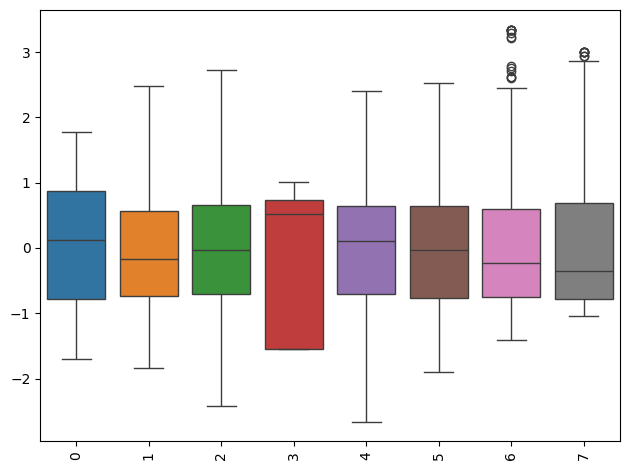

In [43]:
import seaborn as sns
sns.boxplot(data=x_train_nor)  #making a box plot to visualize the spread of data across all the columns

plt.xticks(rotation=90) # Rotate x-axis labels by 90 degrees
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show() ##Pregnancies	Glucose	BloodPressure	SkinThickness Insulin	BMI	DiabetesPedigreeFunction Age


# Model 1: Neural networks for diabetes prediction

In [83]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_nor_sm, y_train_sm = smote.fit_resample(x_train_nor, y_train)
count3= y_train_sm.value_counts()
count3

Outcome
0    349
1    349
Name: count, dtype: int64

In [84]:
np.random.seed(50)

tf.random.set_seed(50)


In [85]:


model = Sequential([
    Dense(30, activation='relu', name='L1', kernel_regularizer=l2(1e-2), input_shape=x_train_nor_sm.shape[1:]),
    Dropout(0.5),  # dropout rate
    Dense(15, activation='relu', name='L2', kernel_regularizer=l2(1e-2)),
    Dropout(0.5),  #  dropout rate
    Dense(8, activation='relu', name='L3', kernel_regularizer=l2(1e-2)),
    Dropout(0.5),  #  dropout rate

    Dense(1, activation='sigmoid', name='Final')
])



# Callbacks for Early Stopping and Reduce Learning Rate
callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True) #stops if no improvement in metric: val_loss for 10 epochs
]




d:\Ash_ML\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


EarlyStopping: Monitors a specific metric (usually validation loss) and stops training if it doesn't improve after a set number of epochs (patience). restore_best_weights=True means that the model will revert to the weights of the epoch with the best performance.

ReduceLROnPlateau: Reduces the learning rate by a factor (here, 0.5) if a monitored metric (usually validation loss) has stopped improving after a set number of epochs (patience).

In [326]:
model.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ (None, 15)             │           465 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 15)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L3 (Dense)                      │ (None, 8)              │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Final (Dense)                   │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 872 (3.41 KB)

 Trainable params: 872 (3.41 KB)

 Non-trainable params: 0 (0.00 B)

In [327]:
from tensorflow.keras.metrics import Recall # Import Recall

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy', Recall()]) 
history = model.fit(x_train_nor_sm, y_train_sm, epochs=30, validation_data=(x_cv_nor, y_cv), callbacks=callbacks)

Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.4932 - loss: 1.1729 - recall_21: 0.4631 - val_accuracy: 0.5565 - val_loss: 1.0818 - val_recall_21: 0.3514
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4909 - loss: 1.1287 - recall_21: 0.5643 - val_accuracy: 0.6000 - val_loss: 1.0503 - val_recall_21: 0.5135
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5212 - loss: 1.0790 - recall_21: 0.6178 - val_accuracy: 0.5913 - val_loss: 1.0209 - val_recall_21: 0.5676
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5496 - loss: 1.0440 - recall_21: 0.6732 - val_accuracy: 0.6522 - val_loss: 0.9928 - val_recall_21: 0.7568
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5187 - loss: 1.0197 - recall_21: 0.6671 - val_accuracy: 0.6870 - val_loss: 0.9680 - val_recall_21: 0.8108
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5436 - loss: 0.9932 - recall_21: 0.7068 - val_accuracy: 0.7130 - val_loss: 0.9442 -

I chose the best values for hyper parameters that give the lowest loss, and best accuracy/recall after experimenting with multiple sets of hyper paramter values


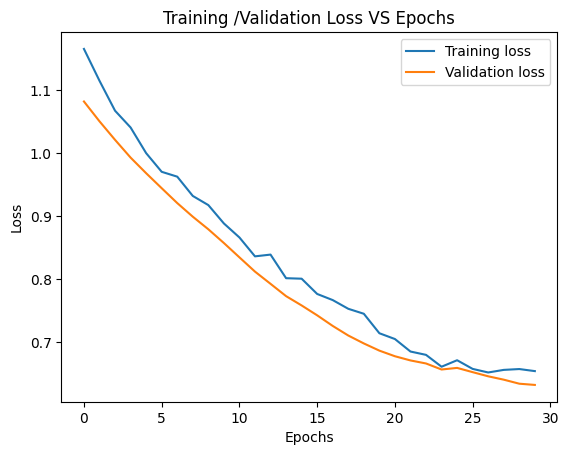

In [328]:

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training /Validation Loss VS Epochs')
plt.show()

In [331]:
test= model.evaluate(x_test_nor, y_test) #evaluating the model using test set


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6828 - loss: 0.6514 - recall_21: 0.7720


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
ANN AUC: 0.8159


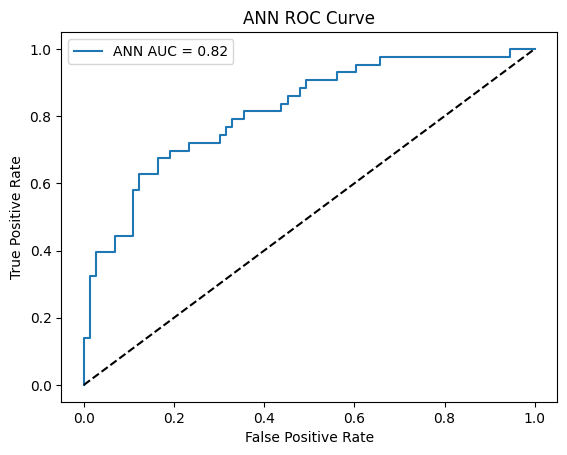

In [330]:
# Calculate AUC/ROC for ANN
y_pred_proba_ann = model.predict(x_test_nor) # Probabilities for class 1
auc_ann = roc_auc_score(y_test, y_pred_proba_ann)
print(f"ANN AUC: {auc_ann:.4f}")

fpr_ann, tpr_ann, thresholds_ann = roc_curve(y_test, y_pred_proba_ann)

plt.plot(fpr_ann, tpr_ann, label=f'ANN AUC = {auc_ann:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ANN ROC Curve')
plt.legend()
plt.show()

In [332]:
from sklearn.metrics import roc_curve

# Assuming you have true labels y_true and predicted probabilities y_scores

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_ann)

# Calculate specificity
specificity = 1 - fpr



# Print the specificity values for each threshold
for i, threshold in enumerate(thresholds):
        print(f"Threshold: {threshold:.2f}, Specificity: {specificity[i]:.2f}, Sensitivity: {tpr[i]:.2f}")



Threshold: inf, Specificity: 1.00, Sensitivity: 0.00
Threshold: 0.77, Specificity: 1.00, Sensitivity: 0.02
Threshold: 0.74, Specificity: 1.00, Sensitivity: 0.14
Threshold: 0.74, Specificity: 0.99, Sensitivity: 0.14
Threshold: 0.71, Specificity: 0.99, Sensitivity: 0.33
Threshold: 0.71, Specificity: 0.97, Sensitivity: 0.33
Threshold: 0.70, Specificity: 0.97, Sensitivity: 0.40
Threshold: 0.69, Specificity: 0.93, Sensitivity: 0.40
Threshold: 0.69, Specificity: 0.93, Sensitivity: 0.44
Threshold: 0.69, Specificity: 0.89, Sensitivity: 0.44
Threshold: 0.67, Specificity: 0.89, Sensitivity: 0.58
Threshold: 0.66, Specificity: 0.88, Sensitivity: 0.58
Threshold: 0.65, Specificity: 0.88, Sensitivity: 0.63
Threshold: 0.64, Specificity: 0.84, Sensitivity: 0.63
Threshold: 0.64, Specificity: 0.84, Sensitivity: 0.67
Threshold: 0.63, Specificity: 0.81, Sensitivity: 0.67
Threshold: 0.62, Specificity: 0.81, Sensitivity: 0.70
Threshold: 0.60, Specificity: 0.77, Sensitivity: 0.70
Threshold: 0.60, Specificity:


Ideal way to compute best threshold based on above data is Youden’s Index (J). J is calculated as J=TPR−FPR. The threshold that maximizes this quantity gives the best balance between FP and FN.

But, for now can see see a good threshold at 0.55 gives a good sensitivity of 0.81, with a specificity of 0.64. While the specificity is still low, atleast a higher threshold of sensitivity means, not missing out on too many patients affected by diabetes



# Model 2: SVM model for diabetes prediction

Given below is a test run of Grid SearchCV for the SVM model.


Gamma values: 
 Scale: Uses the inverse of the product of feature count and variance to adjust gamma.
    If scale is passed, then it uses 1 / (n_features * X.var()) as value of gamma. Avg. variance of all features is used
    
Auto: Uses 1 / n_features. Uses only the number of features to set gamma, ignoring feature variance.
May lead to overfitting (high gamma values) for large datasets. 


Notes: 

#regularizer defines the flexibility of decision boundary
#kernel defines the type of decision boundary
#gamma defines the influence of a single training example reaches. Low value means tighter decision boundary

Let's use scaled data (without SMOTE). We will run SMOTE inside the SVM pipeline itself to avoid data leaks (into validation sets of GridCV).

In [76]:
x_train_nor.shape #non-SMOTE data

(537, 8)

In [77]:
# Combine training and CV data for final training
x_train_cv_combined = np.vstack((x_train_nor, x_cv_nor))  # Combine normalized training and CV features
y_train_cv_combined = np.hstack((y_train, y_cv))         # Combine training and CV labels


In [78]:

print(x_train_cv_combined.shape)
print(y_train_cv_combined.shape)

(652, 8)
(652,)


Running the SVM workflow

In [79]:
svm_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('svc', SVC(probability=True, random_state=42))
])


In [80]:
# Define the parameter grid
param_grid = {
    'svc__C': [0.1, 1, 5],
    'svc__gamma': ['scale', 'auto'],
    'svc__kernel': ['linear']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # to maintain the class distribution in each fold

# Create a GridSearchCV object with scoring set to 'roc_auc'
grid_search = GridSearchCV(
    estimator=svm_pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring='recall',
    n_jobs=-1,
    verbose=2,
    refit=True
)

# Fit the grid search to the training data (x_train_nor) and CV labels (y_train)
grid_search.fit(x_train_nor, y_train)

# Print the best parameters and best score (AUC on CV data)
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated score:", grid_search.best_score_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}
Best cross-validated score: 0.7389758179231863


In [81]:
# Get the best estimator from GridSearchCV
best_svm = grid_search.best_estimator_

best_svm.fit(x_train_cv_combined, y_train_cv_combined)

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('svc',
                 SVC(C=0.1, kernel='linear', probability=True,
                     random_state=42))])

In [341]:
# Predict probabilities on test data
y_pred_svm_prob = best_svm.predict_proba(x_test_nor)[:, 1]

# Convert probabilities to class labels based on a threshold of 0.5
y_pred_svm_class = (y_pred_svm_prob > 0.5).astype(int)

# Evaluate performance metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm_class)
precision_svm = precision_score(y_test, y_pred_svm_class)
recall_svm = recall_score(y_test, y_pred_svm_class)
f1_svm = f1_score(y_test, y_pred_svm_class)
auc_svm = roc_auc_score(y_test, y_pred_svm_prob)

print("Final Test Set Performance:")
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1-Score:", f1_svm)
print(f"AUC: {auc_svm:.4f}")


Final Test Set Performance:
Accuracy: 0.7068965517241379
Precision: 0.5882352941176471
Recall: 0.6976744186046512
F1-Score: 0.6382978723404256
AUC: 0.8171


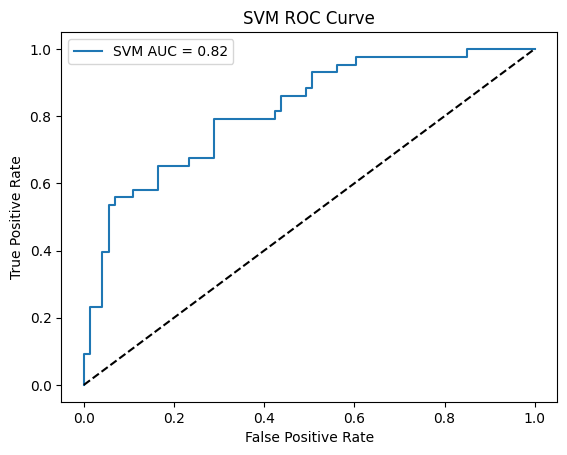


Threshold Analysis:
Threshold: inf, Specificity: 1.00, Sensitivity: 0.00
Threshold: 0.96, Specificity: 1.00, Sensitivity: 0.02
Threshold: 0.94, Specificity: 1.00, Sensitivity: 0.09
Threshold: 0.92, Specificity: 0.99, Sensitivity: 0.09
Threshold: 0.90, Specificity: 0.99, Sensitivity: 0.23
Threshold: 0.87, Specificity: 0.96, Sensitivity: 0.23
Threshold: 0.84, Specificity: 0.96, Sensitivity: 0.40
Threshold: 0.82, Specificity: 0.95, Sensitivity: 0.40
Threshold: 0.77, Specificity: 0.95, Sensitivity: 0.53
Threshold: 0.77, Specificity: 0.93, Sensitivity: 0.53
Threshold: 0.73, Specificity: 0.93, Sensitivity: 0.56
Threshold: 0.70, Specificity: 0.89, Sensitivity: 0.56
Threshold: 0.68, Specificity: 0.89, Sensitivity: 0.58
Threshold: 0.66, Specificity: 0.84, Sensitivity: 0.58
Threshold: 0.61, Specificity: 0.84, Sensitivity: 0.65
Threshold: 0.57, Specificity: 0.77, Sensitivity: 0.65
Threshold: 0.55, Specificity: 0.77, Sensitivity: 0.67
Threshold: 0.52, Specificity: 0.71, Sensitivity: 0.67
Threshol

In [342]:

# Calculate ROC curve values
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_svm_prob)

# Plot ROC curve
plt.plot(fpr_svm, tpr_svm, label=f'SVM AUC = {auc_svm:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend()
plt.show()

specificity_svm = 1 - fpr_svm

print("\nThreshold Analysis:")
for i, threshold in enumerate(thresholds_svm):
        print(f"Threshold: {threshold:.2f}, Specificity: {specificity_svm[i]:.2f}, Sensitivity: {tpr_svm[i]:.2f}")


SVM results are not bad. The model provides moderate accuracy and recall. But the AUC is close to 0.82, which is very encouraging. The linear Kernel confirms that there is not much non-linearity in the data and that most of the features can be captured using linear models. A balanced threshold with high sensitivity and reasnoable specificity can be Threshold: 0.40, Specificity: 0.58, Sensitivity: 0.81

# Model 3: Logistic Regression

In [44]:
logreg_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('logreg', LogisticRegression(
        max_iter=1000,
        solver='liblinear',   # supports l1 & l2
        random_state=42
    ))
])

In [45]:
param_grid_lr = {
    'logreg__penalty': ['l1', 'l2'],
    
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


grid_search_lr = GridSearchCV(
    estimator=logreg_pipeline,
    param_grid=param_grid_lr,
    cv=cv,
    scoring='recall',   
    n_jobs=-1,
    verbose=2,
    refit=True
)


grid_search_lr.fit(x_train_nor, y_train)

print("Best parameters (LogReg):", grid_search_lr.best_params_)
print("Best cross-validated score (LogReg):", grid_search_lr.best_score_)


best_lr = grid_search_lr.best_estimator_

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters (LogReg): {'logreg__penalty': 'l1'}
Best cross-validated score (LogReg): 0.7339971550497866


In [46]:

y_pred_lr_prob = best_lr.predict_proba(x_test_nor)[:, 1]

# Class labels at default threshold 0.5
y_pred_lr_class = (y_pred_lr_prob > 0.5).astype(int)

# Metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr_class)
precision_lr = precision_score(y_test, y_pred_lr_class)
recall_lr = recall_score(y_test, y_pred_lr_class)
f1_lr = f1_score(y_test, y_pred_lr_class)
auc_lr = roc_auc_score(y_test, y_pred_lr_prob)

print("\nFinal Test Set Performance (Logistic Regression):")
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1-Score:", f1_lr)
print(f"AUC: {auc_lr:.4f}")



Final Test Set Performance (Logistic Regression):
Accuracy: 0.7155172413793104
Precision: 0.5961538461538461
Recall: 0.7209302325581395
F1-Score: 0.6526315789473685
AUC: 0.8143


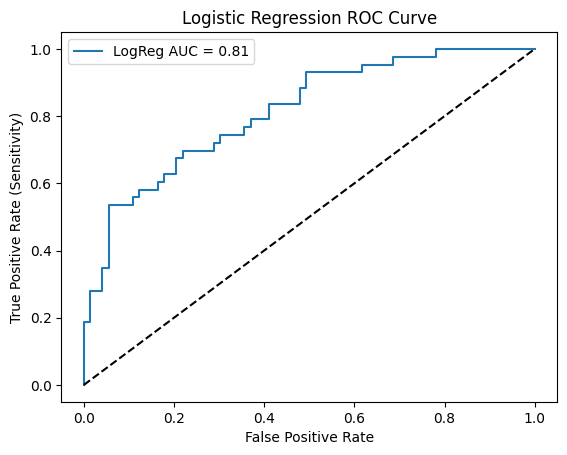


Threshold Analysis (Logistic Regression):
Threshold: inf, Specificity: 1.00, Sensitivity: 0.00
Threshold: 0.98, Specificity: 1.00, Sensitivity: 0.02
Threshold: 0.94, Specificity: 1.00, Sensitivity: 0.19
Threshold: 0.94, Specificity: 0.99, Sensitivity: 0.19
Threshold: 0.92, Specificity: 0.99, Sensitivity: 0.28
Threshold: 0.90, Specificity: 0.96, Sensitivity: 0.28
Threshold: 0.89, Specificity: 0.96, Sensitivity: 0.35
Threshold: 0.89, Specificity: 0.95, Sensitivity: 0.35
Threshold: 0.81, Specificity: 0.95, Sensitivity: 0.53
Threshold: 0.77, Specificity: 0.89, Sensitivity: 0.53
Threshold: 0.77, Specificity: 0.89, Sensitivity: 0.56
Threshold: 0.76, Specificity: 0.88, Sensitivity: 0.56
Threshold: 0.75, Specificity: 0.88, Sensitivity: 0.58
Threshold: 0.73, Specificity: 0.84, Sensitivity: 0.58
Threshold: 0.70, Specificity: 0.84, Sensitivity: 0.60
Threshold: 0.66, Specificity: 0.82, Sensitivity: 0.60
Threshold: 0.66, Specificity: 0.82, Sensitivity: 0.63
Threshold: 0.64, Specificity: 0.79, Sens

In [47]:
# ROC curve values
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_lr_prob)

# Plot ROC
plt.plot(fpr_lr, tpr_lr, label=f'LogReg AUC = {auc_lr:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Logistic Regression ROC Curve')
plt.legend()
plt.show()

# Specificity = 1 - FPR
specificity_lr = 1 - fpr_lr

print("\nThreshold Analysis (Logistic Regression):")
for i, threshold in enumerate(thresholds_lr):
    print(f"Threshold: {threshold:.2f}, Specificity: {specificity_lr[i]:.2f}, Sensitivity: {tpr_lr[i]:.2f}")


Logistic regression results show that model provides moderate accuracy and recall. But the AUC is close to 0.81, which is very encouraging. The linear Kernel confirms that there is not much non-linearity in the data and that most of the features can be captured using linear models. A balanced threshold with high sensitivity and reasnoable specificity can be Threshold: 0.43, Specificity: 0.63, Sensitivity: 0.79

In [53]:
# Extract LR model from pipeline
lr_model = best_lr.named_steps['logreg']

# Get coefficients
coefs = lr_model.coef_[0]

# Correct feature names for PIMA dataset:
feat_names = [
    'Pregnancies',
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI',
    'DiabetesPedigreeFunction',
    'Age'
]

# Pair and sort by absolute magnitude
imp_df = sorted(zip(feat_names, abs(coefs)), key=lambda x: x[1], reverse=True)

print("Top features (by absolute coefficient):")
for name, val in imp_df:
    print(f"{name}: {val:.4f}")


Top features (by absolute coefficient):
Glucose: 1.1296
BMI: 0.8112
Age: 0.4343
DiabetesPedigreeFunction: 0.2545
Pregnancies: 0.2421
Insulin: 0.1729
SkinThickness: 0.1318
BloodPressure: 0.1310


One can see from above values of coefficients the features that were weighed heavily by the LR model. Glucose, undoubtedly is the strongest driver, followed by BMI and Age. This also makes clinical sense as obesity and higher age are linked more to diabetes. The same applies to Pedigree function as family history of diabetes definetly increases chances. The model sees skin thickness and BP as more weaker factors. Insulin being a moderately weak factor is still fine as it slightly redundant w.r.t glucose estimates.




# XGBoost model for diabetes prediciton

In [62]:



print(f"shape of X_train, {x_train.shape}")

print(f"shape of X_test, {x_test.shape}")

print(f"shape of X_cv, {x_cv.shape}")

print(f"shape of y_train (target), {y_train.shape}")
print(f"shape of y_test (target), {y_test.shape}")
print(f"shape of y_cv (target), {y_cv.shape}")


shape of X_train, (537, 8)
shape of X_test, (116, 8)
shape of X_cv, (115, 8)
shape of y_train (target), (537,)
shape of y_test (target), (116,)
shape of y_cv (target), (115,)


In [ ]:
x_train_cv_combined = np.vstack((x_train, x_cv))  # Combine training and CV samples
y_train_cv_combined = np.hstack((y_train, y_cv)) 

People generally use unscaled data sets for the XGBoost model since it can handle outliers because XGBoost (and all tree-based models like Random Forest, LightGBM, etc.) works by splitting the data based on feature thresholds, not by calculating distances like in linear models. But in our case, since we use SMOTE for balancing the dataset, it is better to use scaled values itself for XGBoost as well.

Why put SMOTE inside the pipeline?
To prevent data leakage during cross-validation.
If you apply SMOTE before CV, synthetic samples could leak information from test folds → overoptimistic results.
Putting it inside ensures that SMOTE is applied only on the training part of each CV fold.

In [64]:
import xgboost as xgb

# Compute class weight
num_pos = y_train_cv_combined.sum()
num_neg = len(y_train_cv_combined) - num_pos
scale_pos_weight = num_neg / num_pos
scale_pos_weight

1.8977777777777778

In [67]:


xgb_model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1,
    scale_pos_weight=scale_pos_weight    # <-- KEY
)

param_grid = {
    'n_estimators': [50, 75, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
}


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring="recall",   # optimize sensitivity
    cv=cv,
    n_jobs=-1,
    verbose=2,
    refit=True
)

grid.fit(x_train_cv_combined, y_train_cv_combined)

best_xgb = grid.best_estimator_
print(grid.best_params_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 150}


d:\Ash_ML\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:15:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Set Results:
Accuracy: 0.7241379310344828
Precision: 0.5901639344262295
Recall: 0.8372093023255814
F1-Score: 0.6923076923076923
XGBoost AUC: 0.8085


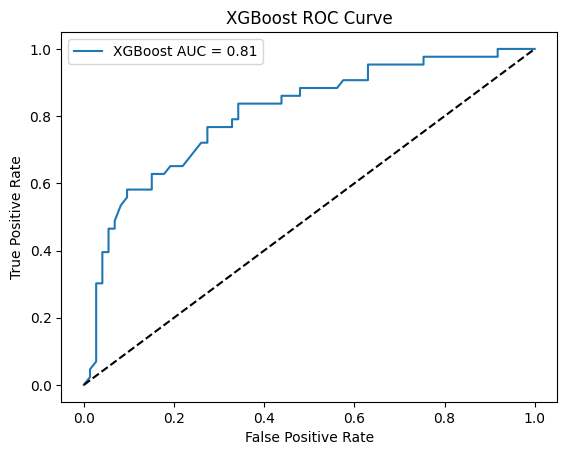

Threshold: inf, Specificity: 1.00, Sensitivity: 0.00
Threshold: 0.84, Specificity: 0.99, Sensitivity: 0.02
Threshold: 0.82, Specificity: 0.99, Sensitivity: 0.05
Threshold: 0.82, Specificity: 0.97, Sensitivity: 0.07
Threshold: 0.76, Specificity: 0.97, Sensitivity: 0.30
Threshold: 0.75, Specificity: 0.96, Sensitivity: 0.30
Threshold: 0.71, Specificity: 0.96, Sensitivity: 0.33
Threshold: 0.70, Specificity: 0.96, Sensitivity: 0.40
Threshold: 0.70, Specificity: 0.95, Sensitivity: 0.40
Threshold: 0.69, Specificity: 0.95, Sensitivity: 0.47
Threshold: 0.69, Specificity: 0.93, Sensitivity: 0.47
Threshold: 0.67, Specificity: 0.93, Sensitivity: 0.49
Threshold: 0.66, Specificity: 0.92, Sensitivity: 0.53
Threshold: 0.66, Specificity: 0.90, Sensitivity: 0.56
Threshold: 0.65, Specificity: 0.90, Sensitivity: 0.58
Threshold: 0.64, Specificity: 0.85, Sensitivity: 0.58
Threshold: 0.63, Specificity: 0.85, Sensitivity: 0.63
Threshold: 0.63, Specificity: 0.82, Sensitivity: 0.63
Threshold: 0.63, Specificity:

In [73]:



#Testing with 'Test' data:
y_pred_xgb_prob = best_xgb.predict_proba(x_test)[:, 1]  # Probabilities for class 1
y_pred_xgb_class = (y_pred_xgb_prob > 0.5).astype(int)  # Convert to class labels

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_xgb_class)
precision = precision_score(y_test, y_pred_xgb_class)
recall = recall_score(y_test, y_pred_xgb_class)
f1 = f1_score(y_test, y_pred_xgb_class)
auc = roc_auc_score(y_test, y_pred_xgb_prob)  # AUC score

print("Test Set Results:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print(f"XGBoost AUC: {auc:.4f}")

# Plot ROC Curve
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_xgb_prob)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend()
plt.show()

# Calculate specificity_xgb
specificity_xgb = 1 - fpr_xgb

# Print the specificity and sensitivity values for each threshold
for i, threshold in enumerate(thresholds_xgb):
    
        print(f"Threshold: {threshold:.2f}, Specificity: {specificity_xgb[i]:.2f}, Sensitivity: {tpr_xgb[i]:.2f}")

XGBoost has performed well. From the above results, optimal threshold: 0.50, Specificity: 0.66, Sensitivity: 0.84

### Feature importance (XGBoost)

In [69]:
best_pipeline = grid_search_xgb.best_estimator_
best_pipeline.fit(x_train_cv_combined, y_train_cv_combined)

d:\Ash_ML\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:16:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=75,
              n_jobs=-1, num_parallel_tree=None, random_state=42, ...)

In [72]:
xgb_model = best_pipeline
importances = xgb_model.feature_importances_
# if X_test is DataFrame:
if hasattr(x_test, 'columns'):
    feat_names = x_test.columns
else:
    feat_names = [f'feat_{i}' for i in range(len(importances))]
imp_df = sorted(zip(feat_names, importances), key=lambda x: x[1], reverse=True)
for name, val in imp_df:
    print(f"{name}: {val:.4f}")

Glucose: 0.2722
BMI: 0.1376
Insulin: 0.1325
Age: 0.1260
Pregnancies: 0.1036
SkinThickness: 0.0845
DiabetesPedigreeFunction: 0.0782
BloodPressure: 0.0654



Summary of results: 

1. AUC - 0.81 is solid for a clinical screening-style classifier on typical diabetes datasets — model discriminates positives from negatives reasonably well.

2. Precision/recall and F1 show a balanced operating point at threshold ~0.5 (precision ~0.60, recall >0.80). That’s a reasonable trade-off if goal is to both detect many positives and keep false alarms moderate.

3. We can clearly see the glucose, BMI and Insulin are the key features found to influence diabetes prediction. This Feature ranking is clinically plausible.

### Pickle the models

In [92]:
import os
import pickle

# Create the directory if it doesn't exist
os.makedirs('models3', exist_ok=True)


pickle.dump(scaler, open('models3/diabetes3_scaler.pkl', 'wb'))

# Save the lr  model
pickle.dump(best_lr, open('models3/diabetes3_lr.pkl', 'wb'))

# Save the SVM model
pickle.dump(best_svm, open('models3/diabetes3_svm.pkl', 'wb'))

# Save the XGBoost model
pickle.dump(best_xgb, open('models3/diabetes3_xgb.pkl', 'wb'))

# Save the ANN model
model.save('models3/diabetes3_ann.h5')